# Backtesting

In [3]:
#import statements
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
sns.set_theme(color_codes=True)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import yfinance as yf
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
import talib
sns.set_theme(color_codes=True)
API_KEY = 'EC1W3AWVDZ3LA1T8'
ts= TimeSeries(key=API_KEY,output_format='pandas' )
ti = TechIndicators(key=API_KEY,output_format='pandas')
sns.set(rc={'figure.figsize':(30,9)})

In [4]:
#get data from yahoo finance
ticker = 'AAPL'
start = '2020-01-01'
end = '2020-04-30'
def get_data(interval:str):
    data, meta_data = ts.get_intraday(symbol=ticker,interval=interval, outputsize='full',)
    data['open'] = data['1. open']
    data['high'] = data['2. high']
    data['low'] = data['3. low']
    data['close'] = data['4. close']
    data['volume'] = data['5. volume']
    data.drop(['1. open','2. high','3. low','4. close','5. volume'],axis=1,inplace=True)
    data.sort_index(inplace=True)
    return data
df_5= get_data('5min')
df_15 = get_data('15min')


In [5]:
LAG =500
def getEMA_SMA_BANDS(df, period):
    df['EMA_'+str(period)] = df['close'].ewm(span=period,min_periods=period).mean()
    df['SMA_'+str(period)] = df['close'].rolling(window=period).mean()
    df['Rolling Std'] = df['close'].rolling(window=period).std()
    df['Upper Band'] = df['EMA_'+str(period)] + (df['Rolling Std']*1.4)
    df['Lower Band'] = df['EMA_'+str(period)] - (df['Rolling Std']*1.4)
    # df = df[period:]
    return df
getEMA_SMA_BANDS(df_5, LAG)
getEMA_SMA_BANDS(df_15, LAG)
print(df_15['close'].describe())
df_15

count    1853.000000
mean      168.890772
std         5.864883
min       154.150000
25%       165.240000
50%       168.860000
75%       173.670000
max       179.410200
Name: close, dtype: float64


,open,high,low,close,volume,EMA_500,SMA_500,Rolling Std,Upper Band,Lower Band
date,,,,,,,,,,
2022-03-21 04:15:00,164.0000,164.00,163.30,163.68,9775.0,NaN,NaN,NaN,NaN,NaN
2022-03-21 04:30:00,163.3500,163.51,163.35,163.35,6878.0,NaN,NaN,NaN,NaN,NaN
2022-03-21 04:45:00,163.3000,163.49,163.29,163.48,2371.0,NaN,NaN,NaN,NaN,NaN
2022-03-21 05:00:00,163.5000,163.50,163.00,163.00,6173.0,NaN,NaN,NaN,NaN,NaN
2022-03-21 05:15:00,163.1000,163.25,163.01,163.24,7331.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-29 19:00:00,157.8500,157.93,157.85,157.90,13719.0,161.906668,162.358148,4.015574,167.528471,156.284864
2022-04-29 19:15:00,157.8701,157.93,157.86,157.90,10466.0,161.890663,162.338348,4.013094,167.508995,156.272331
2022-04-29 19:30:00,157.9000,157.99,157.90,157.99,17632.0,161.875082,162.318728,4.010318,167.489528,156.260637


<AxesSubplot:xlabel='date'>

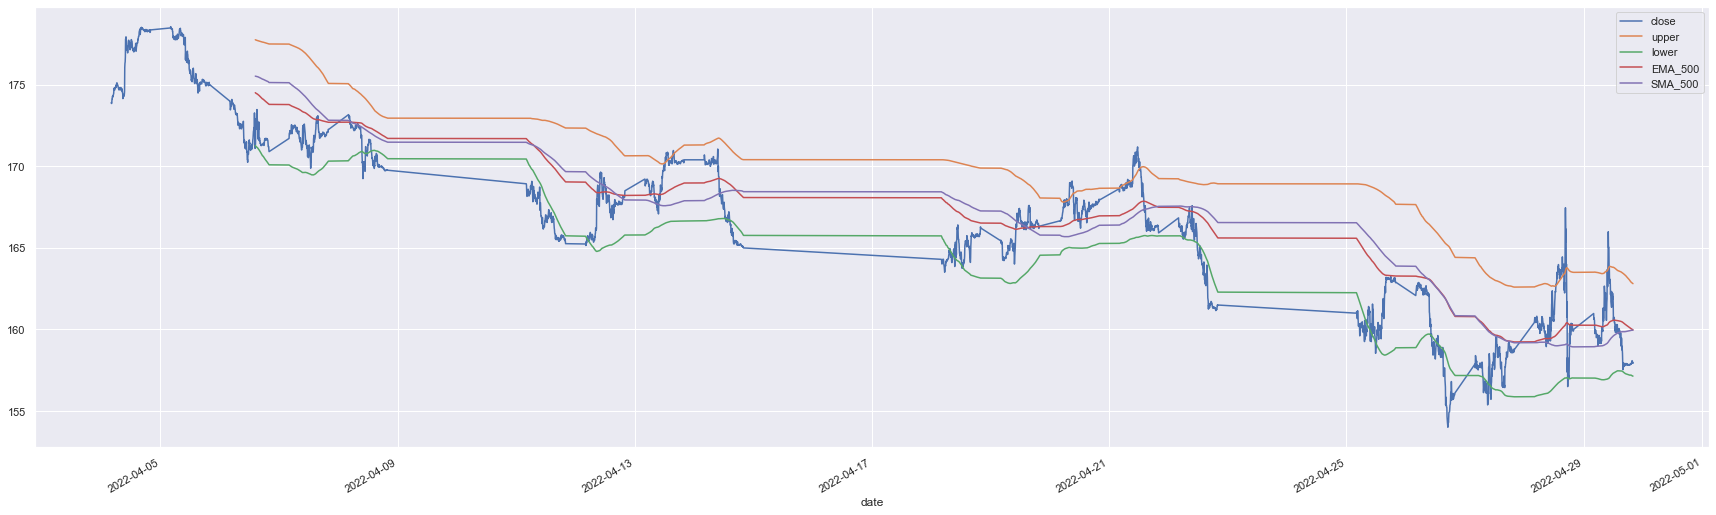

In [6]:
plot_df = pd.DataFrame(index=df_5.index)
plot_df['close'] = df_5['close']
plot_df['upper'] = df_5['Upper Band']
plot_df['lower'] = df_5['Lower Band']
plot_df['EMA_500'] = df_5['EMA_500']
plot_df['SMA_500'] = df_5['SMA_500']
plot_df.plot(figsize=(30,9),)
# sns.lineplot(data=plot_df,)
# px.line(plot_df, )



In [7]:
#iterate through the dataframe and buy if if the prive is below the lower band
#sell if the price is above the upper band

is_already_bought = False
plot_df['signal'] = 0

for date, row in plot_df.T.iteritems():
    if row['close'] < row['lower']:
        if is_already_bought == False:
            is_already_bought = True
            print('bought on {}'.format(date))
            plot_df['signal'][date]  = 1
        else:
            print('already bought on {}'.format(date))
    elif row['close'] > row['upper']:
        if is_already_bought == True:
            is_already_bought = False
            print('sold on {}'.format(date))
            plot_df['signal'][date]  = -1
        else:
            print('already sold on {}'.format(date))
        print('Sell')
    else:
        print('Hold')
plot_df

Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold


/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_5077/2979016933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['signal'][date]  = 1
/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_5077/2979016933.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['signal'][date]  = -1


Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold


,close,upper,lower,EMA_500,SMA_500,signal
date,,,,,,
2022-04-04 04:05:00,173.90,NaN,NaN,NaN,NaN,0
2022-04-04 04:10:00,173.90,NaN,NaN,NaN,NaN,0
2022-04-04 04:15:00,173.85,NaN,NaN,NaN,NaN,0
2022-04-04 04:20:00,173.90,NaN,NaN,NaN,NaN,0
2022-04-04 04:25:00,174.11,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
2022-04-29 19:40:00,158.09,162.859565,157.157990,160.008778,159.953469,0
2022-04-29 19:45:00,158.05,162.850020,157.151896,160.000958,159.954612,0
2022-04-29 19:50:00,157.95,162.839217,157.146324,159.992771,159.956192,0


In [8]:
# count the number of times the stock was bought and sold
a = plot_df.groupby('signal')
a.count()

,close,upper,lower,EMA_500,SMA_500
signal,,,,,
-1,4,4,4,4,4
0,3570,3071,3071,3071,3071
1,4,4,4,4,4


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

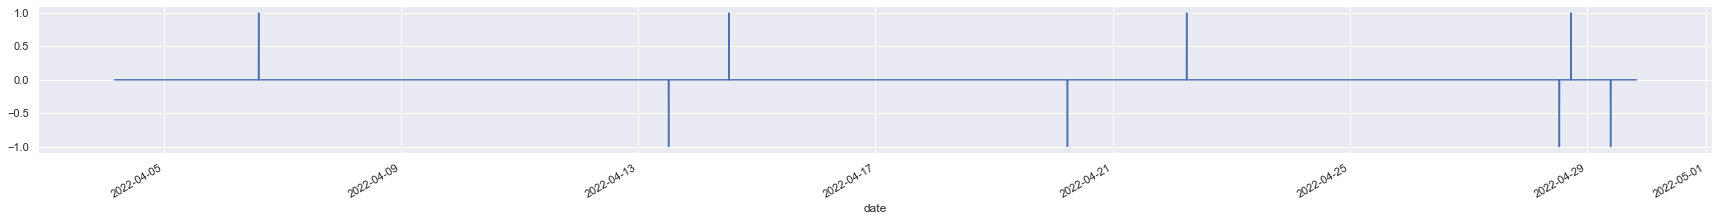

In [27]:
plot_df['signal'].plot(figsize=(30,3),)
